Итоговая работа

Датасет содержит информацию о продажах британского онлайн магазина в период с 1 декабря 2010 по 9 декабря 2011. Продажи осуществляются в нескольких странах. Компания в основном продает уникальные подарки на все случаи жизни. Многие клиенты компании являются оптовиками.

1. Получение данных


In [1]:
#Импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt

In [101]:
import seaborn as sns

In [25]:
#Увеличим размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 12,5

In [166]:
#Загружаем данные из файла
df = pd.read_csv('data.csv', encoding = 'windows-1252')

In [167]:
#Посмотрим первые 5 строк нашего датафрейма
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


Датафрейм состоит из 8 столбцов:
1. InvoiceNo - Номер счета-фактуры. 6-значный номер, присвоенный каждой транзакции. Если этот код начинается с буквы "с", это означает возврат.
2. StockCode - Код товара. 5-значный номер, присвоенный каждому отдельному продукту.
3. Description - Название продукта (товара).
4. Quantity - Количество каждого продукта (товара) на транзакцию.
5. InvoiceDate - Дата и время совершения покупки.
6. UnitPrice - Цена продукта за единицу в фунтах стерлингов.
7. CustomerID - Уникальный номер, присвоенный каждому клиенту.
8. Country - Страна покупки.

2. Обработка и чистка данных

In [168]:
#Выведем информацию о нашем датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [169]:
#Смотрим сколько пропусков есть в данных
(df.isna().mean()*100).round(2)

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

При анализе количества null значений в датафрейме, обращает на себя внимание тот факт, что около 25% записей не привязаны к конкретному клиенту. С имеющимися данными невозможно установить ID клиента или подставить отсутствующие значения. Поэтому было принято решение удалить их из датафрейма.

In [170]:
#Удалим строки, в которых есть пропуски данных
df = df.dropna()

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [172]:
#Удалим полностью повторяющиеся записи в данных
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    401604 non-null  object 
 1   StockCode    401604 non-null  object 
 2   Description  401604 non-null  object 
 3   Quantity     401604 non-null  int64  
 4   InvoiceDate  401604 non-null  object 
 5   UnitPrice    401604 non-null  float64
 6   CustomerID   401604 non-null  float64
 7   Country      401604 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.6+ MB


In [173]:
#Приведем столбец CustomerID к типу данных Int64, так как float64 здесь не нужен и только замедлит вычисления      
df['CustomerID'] = df['CustomerID'].astype('Int64')

In [174]:
#Выведем статистическую информацию о нашем датасете
df.describe()

,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


3. Анализ данных

In [175]:
#Посчитаем количество уникальных товаров:
print('Количество уникальных товаров:',len(df['Description'].unique()))

Количество уникальных товаров: 3896


In [176]:
#Создадим столбец TotalSum в котором подсчитаем сумму, уплаченную за каждый товар
df['TotalSum'] = df['Quantity']*df['UnitPrice']
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSum
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850,United Kingdom,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850,United Kingdom,25.50
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850,United Kingdom,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850,United Kingdom,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047,United Kingdom,54.08


In [177]:
#Посмотрим, какие товары клиенты покупали больше всего и построим визуализацию
items = df['Description'].value_counts().head(10)
print(items)

WHITE HANGING HEART T-LIGHT HOLDER    2058
REGENCY CAKESTAND 3 TIER              1894
JUMBO BAG RED RETROSPOT               1659
PARTY BUNTING                         1409
ASSORTED COLOUR BIRD ORNAMENT         1405
LUNCH BAG RED RETROSPOT               1345
SET OF 3 CAKE TINS PANTRY DESIGN      1224
POSTAGE                               1196
LUNCH BAG  BLACK SKULL.               1099
PACK OF 72 RETROSPOT CAKE CASES       1062
Name: Description, dtype: int64


Text(0, 0.5, 'Пролажи, штук')

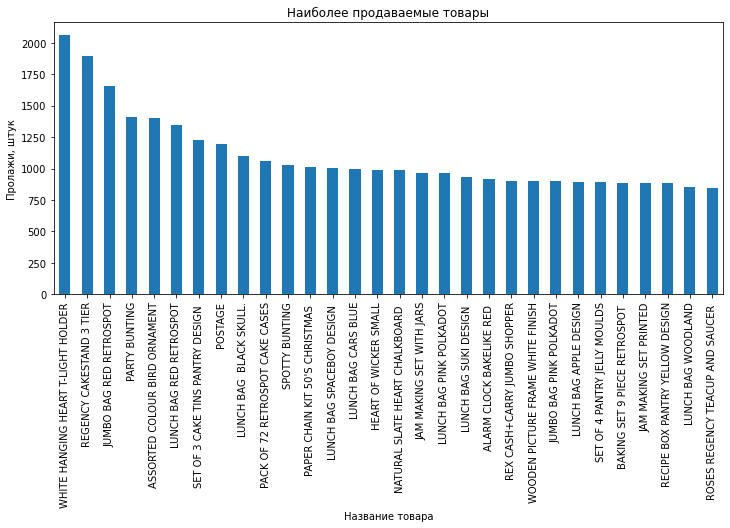

In [178]:
df['Description'].value_counts().head(30).plot(kind = 'bar')
plt.title('Наиболее продаваемые товары')
plt.xlabel('Название товара')
plt.ylabel('Пролажи, штук')

In [179]:
#Посмотрим, какие товары принесли нам наибольшую выручку
df.groupby(['Description']).sum('TotalSum').sort_values('TotalSum', ascending = False)['TotalSum'].head(10)

Description
REGENCY CAKESTAND 3 TIER              132567.70
WHITE HANGING HEART T-LIGHT HOLDER     93767.80
JUMBO BAG RED RETROSPOT                83056.52
PARTY BUNTING                          67628.43
POSTAGE                                66710.24
ASSORTED COLOUR BIRD ORNAMENT          56331.91
RABBIT NIGHT LIGHT                     51042.84
CHILLI LIGHTS                          45915.41
PAPER CHAIN KIT 50'S CHRISTMAS         41423.78
PICNIC BASKET WICKER 60 PIECES         39619.50
Name: TotalSum, dtype: float64

Text(0, 0.5, 'Пролажи, в фунтах стерлингов')

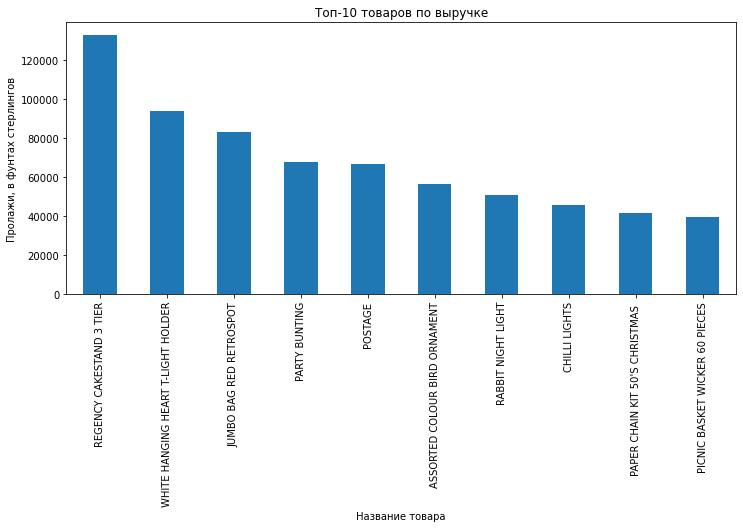

In [180]:
df.groupby(['Description']).sum('TotalSum').sort_values('TotalSum', ascending = False)['TotalSum'].head(10).plot(kind = 'bar')
plt.title('Топ-10 товаров по выручке')
plt.xlabel('Название товара')
plt.ylabel('Пролажи, в фунтах стерлингов')

In [181]:
#Посчитаем показатель пенетрации - частоты появления в чеке того или иного наименования
penetration = df.groupby('Description').count().reset_index()[['Description','InvoiceNo']]
penetration['Penetration'] = (penetration['InvoiceNo']/len(df['InvoiceNo'].unique()))*100
penetration.sort_values('Penetration', ascending = False).head(10)

,Description,InvoiceNo,Penetration
3716,WHITE HANGING HEART T-LIGHT HOLDER,2058,9.274448
2780,REGENCY CAKESTAND 3 TIER,1894,8.535376
1771,JUMBO BAG RED RETROSPOT,1659,7.476341
2355,PARTY BUNTING,1409,6.349707
217,ASSORTED COLOUR BIRD ORNAMENT,1405,6.331681
1953,LUNCH BAG RED RETROSPOT,1345,6.061289
3014,SET OF 3 CAKE TINS PANTRY DESIGN,1224,5.515998
2624,POSTAGE,1196,5.389815
1945,LUNCH BAG BLACK SKULL.,1099,4.952681
2279,PACK OF 72 RETROSPOT CAKE CASES,1062,4.785940


In [182]:
#Далее можно найти посетителей, которые принесли нам наибольшую выручку
df.groupby(['CustomerID']).sum().sort_values('TotalSum', ascending = False)['TotalSum'].head(10)

CustomerID
14646    279489.02
18102    256438.49
17450    187322.17
14911    132458.73
12415    123725.45
14156    113214.59
17511     88125.38
16684     65892.08
13694     62690.54
15311     59284.19
Name: TotalSum, dtype: float64

<AxesSubplot:>

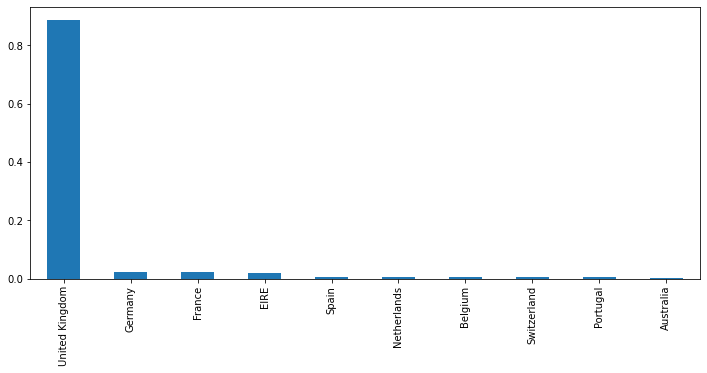

In [183]:
#Посмотрим распределение количества заказов по странам
df['Country'].value_counts(normalize = True).head(10).plot(kind='bar')

Данная стобчатая диаграмма показывает, что подавляющее большинство заказов было сделано в Великобритании.

In [184]:
#Приведем столбец InvoiceDate к формату Дата
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [185]:
#Создадим столбец Month_Year, в котором отобразим информацию только о месяце и годе покупки. 
#Данный столбец понадобится нам для дальнейшей группировки  
df['Month_Year'] = df['InvoiceDate'].dt.to_period('M')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSum,Month_Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,2011-12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,2011-12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12


In [186]:
#Рассчитаем сумму и количество возвратов для каждого месяца
monthly_returns = df[df['Quantity']<0][['Month_Year','Quantity','TotalSum']]
monthly_returns = monthly_returns.groupby('Month_Year').sum().reset_index().rename(columns={'Quantity': 'Quantity_of_losses', 'TotalSum': 'Sum_of_losses'})
monthly_returns

,Month_Year,Quantity_of_losses,Sum_of_losses
0,2010-12,-15886,-18049.87
1,2011-01,-79767,-94369.41
2,2011-02,-2800,-10550.85
3,2011-03,-4528,-15505.55
4,2011-04,-13639,-43151.66
5,2011-05,-5833,-30343.48
6,2011-06,-6775,-53183.53
7,2011-07,-6013,-25850.58
8,2011-08,-12325,-28972.95
9,2011-09,-7304,-21333.97


In [187]:
#Посчитаем выручку и количество продаж для каждого месяца
monthly_sales = df[df['Quantity']>0][['Month_Year','Quantity','TotalSum']]
monthly_sales = monthly_sales.groupby('Month_Year').sum().reset_index()
monthly_sales

,Month_Year,Quantity,TotalSum
0,2010-12,311063,570422.730
1,2011-01,348522,568101.310
2,2011-02,265043,446084.920
3,2011-03,347623,594081.760
4,2011-04,291369,468374.331
5,2011-05,372948,677355.150
6,2011-06,363014,660046.050
7,2011-07,367372,598962.901
8,2011-08,398190,644051.040
9,2011-09,543654,950690.202


In [189]:
#Сведем все данные о продажах и потерях в одну таблицу
profit_and_lost = monthly_sales.merge(monthly_returns, how = 'left', on = 'Month_Year')

In [190]:
#Рассчитаем процент возврата в штуках и в денежном выражении
profit_and_lost['Losses_qty(%)'] = ((profit_and_lost['Quantity_of_losses']*(-1))/profit_and_lost['Quantity'])*100
profit_and_lost['Losses_sum(%)'] = ((profit_and_lost['Sum_of_losses']*(-1))/profit_and_lost['TotalSum'])*100
profit_and_lost

,Month_Year,Quantity,TotalSum,Quantity_of_losses,Sum_of_losses,Losses_qty(%),Losses_sum(%)
0,2010-12,311063,570422.730,-15886,-18049.87,5.107004,3.164297
1,2011-01,348522,568101.310,-79767,-94369.41,22.887221,16.611370
2,2011-02,265043,446084.920,-2800,-10550.85,1.056432,2.365211
3,2011-03,347623,594081.760,-4528,-15505.55,1.302561,2.610003
4,2011-04,291369,468374.331,-13639,-43151.66,4.681006,9.213071
5,2011-05,372948,677355.150,-5833,-30343.48,1.564025,4.479700
6,2011-06,363014,660046.050,-6775,-53183.53,1.866319,8.057548
7,2011-07,367372,598962.901,-6013,-25850.58,1.636761,4.315890
8,2011-08,398190,644051.040,-12325,-28972.95,3.095256,4.498549
9,2011-09,543654,950690.202,-7304,-21333.97,1.343502,2.244051


Как видно из приведенной таблицы, объем возвратов в 8 из 13 месяцев не превышает 5%.
В апреле и июне % возвратов составляет 9% и 8% соответственно,что уже является довольно большим показателем и может послужить триггером для принятия мероприятий по поиску и устранению причин возвратов.
В январе и декабре 2011 года процент возвратов аномально большой - 16% и 33% соответственно, что требует отдельного исследования по поиску причин.

In [191]:
#Приведем столбец month_year к типу данных "строка" для построения визуализации
monthly_sales['Month_Year'] = monthly_sales['Month_Year'].astype('str')

Text(0, 0.5, 'Пролажи, млн.')

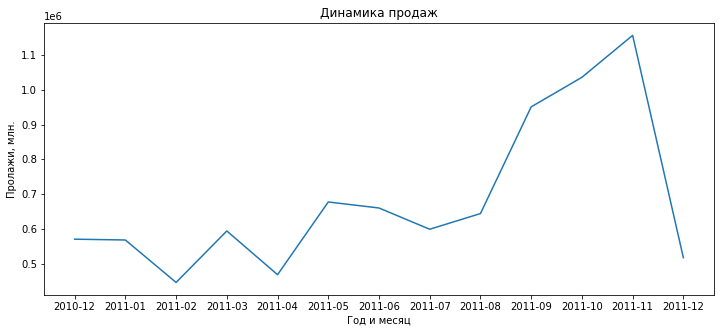

In [192]:
#Построим график суммарных продаж(товарооборота) по месяцам
plt.plot(monthly_sales['Month_Year'],monthly_sales['TotalSum'])
plt.title('Динамика продаж') 
plt.xlabel('Год и месяц')
plt.ylabel('Пролажи, млн.')

Как видно из графика, продажи по году в целом увеличивались и к ноябрю 2011 года достигли максимального значения. В декабре 2011 года продажи упали, это связано с тем, что у нас есть данные по продажам только первых  дней данного месяца.

In [193]:
#Посмотрим динамику среднего чека по месяцам и построим визуализацию
monthly_sales['average_check'] = monthly_sales['TotalSum']/monthly_sales['Quantity']
monthly_sales

,Month_Year,Quantity,TotalSum,average_check
0,2010-12,311063,570422.730,1.833785
1,2011-01,348522,568101.310,1.630030
2,2011-02,265043,446084.920,1.683066
3,2011-03,347623,594081.760,1.708983
4,2011-04,291369,468374.331,1.607495
5,2011-05,372948,677355.150,1.816219
6,2011-06,363014,660046.050,1.818239
7,2011-07,367372,598962.901,1.630399
8,2011-08,398190,644051.040,1.617447
9,2011-09,543654,950690.202,1.748705


Text(0, 0.5, 'Средний чек, у.е.')

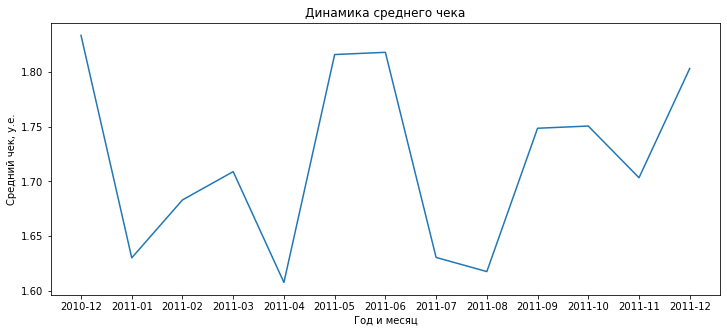

In [194]:
plt.plot(monthly_sales['Month_Year'],monthly_sales['average_check'])
plt.title('Динамика среднего чека') 
plt.xlabel('Год и месяц')
plt.ylabel('Средний чек, у.е.')

In [195]:
#Посмотрим праздники, которые отмечают в Великобритании
pd.read_html('https://www.englishdom.com/blog/nacionalnye-prazdniki-velikobritanii/')[1]

,КОГДА,НАЗВАНИЕ,СТРАНА КОРОЛЕВСТВА
0,25 января,Ночь Бёрнса Burns Night,Шотландия
1,14 февраля,День Святого Валентина St. Valentine’s Day,Всё государство
2,1 марта,День Святого ДавидаSt. David’s Day,Уэльс
3,4е воскресенье Великого поста,День Матери Mother’s Day/Mothering Sunday,Всё государство
4,1 апреля,День дурака Fool’s Day/April Fools Day,Всё государство
5,1 апреля,День дурака Fool’s Day/April Fools Day,Всё государство
6,23 апреля,День Святого Георгия St. George’s Day,Англия
7,1 мая,Белтан Beltane/Beltain,"Шотландия, Ирландия"
8,"1я, 2я или 3я суббота Июня",День рождения Королевы Queen's Official Birthday,Всё государство
9,3е воскресенье июня,День отцаFather’s Day,Всё государство


Так как наш магазин специализируется на продаже подарков, логично предположить, что всплески продаж и увеличения среднего чека можно ожидать в месяцы, когда много национальных праздников. Из таблицы видно, что большое количество праздников приходится на конец октября и ноябрь, например такие как Хэллоуин и Ночь костров, а также в декабре главный праздник для всех католиров - Рождество. В это время в нашем магазине наблюдаются максимальные продажи и увеличенный средний чек.

<AxesSubplot:ylabel='Frequency'>

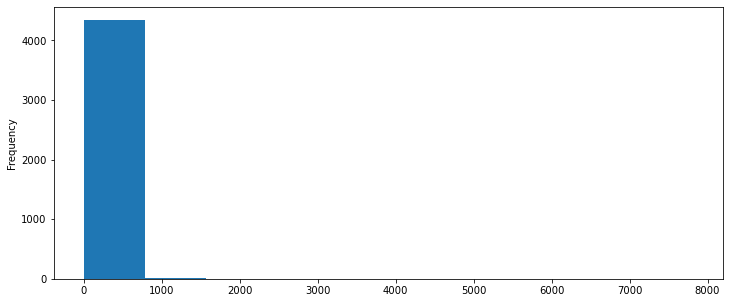

In [196]:
#df.groupby('CustomerID').count().sort_values('InvoiceNo')
df.groupby('CustomerID').count().sort_values('InvoiceNo')['InvoiceNo'].plot(kind = 'hist')

RFM Analysis

RFM аббревиатура (англ. Recency Frequency Monetary — давность, частота, деньги) — сегментация клиентов в анализе сбыта по лояльности.

Определяет три группы:

Recency (давность) — давность сделки, чем меньше времени прошло с момента последней активности клиента, тем больше вероятность, что он повторит действие.
Frequency (частота) — количество сделок, чем больше каких-либо действий совершил клиент, тем больше вероятность того, что он его повторит в будущем.
Monetary (деньги) — сумма сделок, чем больше денег было потрачено, тем больше вероятность того, что он сделает заказ.

Чтобы рассчитать давность, нам нужно выбрать точку даты, с которой мы оцениваем, сколько дней назад была последняя покупка клиента.

In [197]:
df['Date'] = df['InvoiceDate'].apply(lambda x: x.date())
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSum,Month_Year,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010-12-01


In [73]:
recency_df = df.groupby(by='CustomerID',as_index=False)['Date'].max()
recency_df.columns = ['CustomerID','LastPurchaseDate']
recency_df.head(5)

,CustomerID,LastPurchaseDate
0,12346,2011-01-18
1,12347,2011-12-07
2,12348,2011-09-25
3,12349,2011-11-21
4,12350,2011-02-02


In [91]:
import datetime
now = datetime.date(2021, 12, 10)

In [92]:
recency_df['Recency'] = recency_df['LastPurchaseDate'].apply(lambda x: (now - x).days)
recency_df.drop('LastPurchaseDate',axis = 1,inplace=True)
recency_df.head(5)

,CustomerID,Recency
0,12346,3979
1,12347,3656
2,12348,3729
3,12349,3672
4,12350,3964


Частота помогает нам узнать, сколько раз клиент покупал у нас. Для этого нам нужно проверить, сколько счетов зарегистрировано одним и тем же клиентом.

In [94]:
temp = df.copy()
frequency_df = temp.groupby(by=['CustomerID'], as_index=False)['InvoiceNo'].count()
frequency_df.columns = ['CustomerID','Frequency']
frequency_df.head()

,CustomerID,Frequency
0,12346,2
1,12347,182
2,12348,31
3,12349,73
4,12350,17


Monetary (деньги) отвечает на вопрос: сколько денег клиент потратил за это время?
Посчитаем данный показатель:

In [98]:
monetary_df = df.groupby(by = 'CustomerID',as_index=False).agg({'TotalSum':'sum'})
monetary_df.columns = ['CustomerID','TotalQuanity']
monetary_df.head(5)

,CustomerID,TotalQuanity
0,12346,0.00
1,12347,4310.00
2,12348,1797.24
3,12349,1757.55
4,12350,334.40


In [100]:
rfm_df = recency_df.merge(frequency_df,on='CustomerID').merge(monetary_df,on='CustomerID')
rfm_df.set_index('CustomerID',inplace=True)
rfm_df.head(5)

,Recency,Frequency,TotalQuanity
CustomerID,,,
12346,3979,2,0.00
12347,3656,182,4310.00
12348,3729,31,1797.24
12349,3672,73,1757.55
12350,3964,17,334.40


Далее посмотрим есть ли корелляция между тремя признаками.

               Recency  Frequency  TotalQuanity
Recency       1.000000  -0.207375     -0.131813
Frequency    -0.207375   1.000000      0.449659
TotalQuanity -0.131813   0.449659      1.000000


<AxesSubplot:>

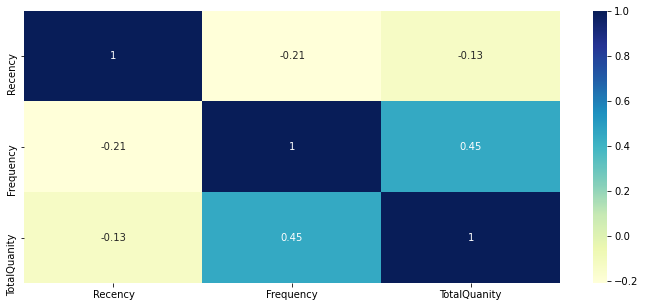

In [104]:
#Построим тепловую карту и выведем коэффициенты корелляции
print(rfm_df.corr())
sns.heatmap(rfm_df.corr(),cmap="YlGnBu",annot=True)

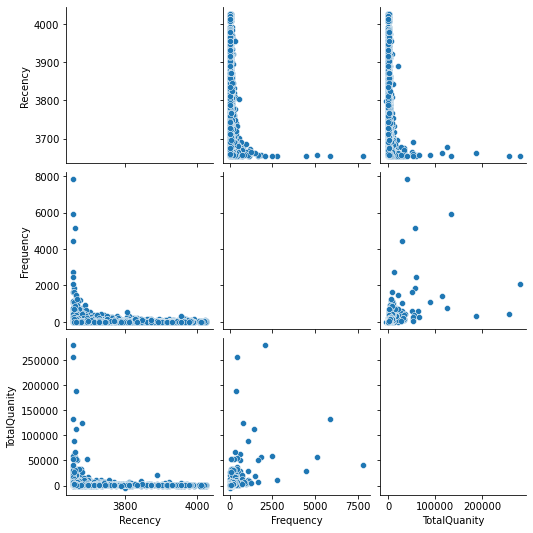

In [106]:
#Построим точечную диаграмму
sns.pairplot(rfm_df, diag_kind="scatter")

Как можно видеть из построенных визуализаций между показателями нет сильной корелляции.
Только между показателем "частота покупки" (Frequency) и "общая сумма потраченных за период денег" (Monetary) есть прямая корелляция умереной силы. 

4. Построение модели предсказания продаж

In [198]:
from sklearn.model_selection import train_test_split

In [199]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalSum', 'Month_Year', 'Date'],
      dtype='object')

In [200]:
X = df[['Quantity', 'UnitPrice', 'CustomerID']]
y = df['TotalSum']

In [201]:
X

,Quantity,UnitPrice,CustomerID
0,6,2.55,17850
1,6,3.39,17850
2,8,2.75,17850
3,6,3.39,17850
4,6,3.39,17850
...,...,...,...
541904,12,0.85,12680
541905,6,2.10,12680
541906,4,4.15,12680
541907,4,4.15,12680


In [202]:
y

0         15.30
1         20.34
2         22.00
3         20.34
4         20.34
          ...  
541904    10.20
541905    12.60
541906    16.60
541907    16.60
541908    14.85
Name: TotalSum, Length: 401604, dtype: float64

In [203]:
# Разделяем данные на часть для обучения и часть для проверки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [204]:
#Для предсказания продаж будем использовать линейную регрессию
from sklearn.linear_model import LinearRegression

In [205]:
lr = LinearRegression() 

In [206]:
#Обучим модель данных
lr.fit(X_train, y_train)

LinearRegression()

In [207]:
# Оцениваем качество модели при помощи MSE
from sklearn.metrics import mean_squared_error

In [208]:
mean_squared_error(y_test, lr.predict(X_test))

48242.202748542484

In [209]:
mean_squared_error(y_train, lr.predict(X_train))

23281.058988556535